In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import iris dataset
iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [5]:
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Data Preprocessing

    We've applied normalization to the features using Normalizer() from scikit-learn, which is a good practice, especially for distance-based algorithms like KNN.
    The pair plots before and after normalization are a useful visualization to observe the impact of normalization on the data distribution.

In [7]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
test_size= 0.2,
shuffle= True, #shuffle the data to avoid bias
random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [8]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')


training set size: 120 samples 
test set size: 30 samples


In [9]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [10]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


## Visualization

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

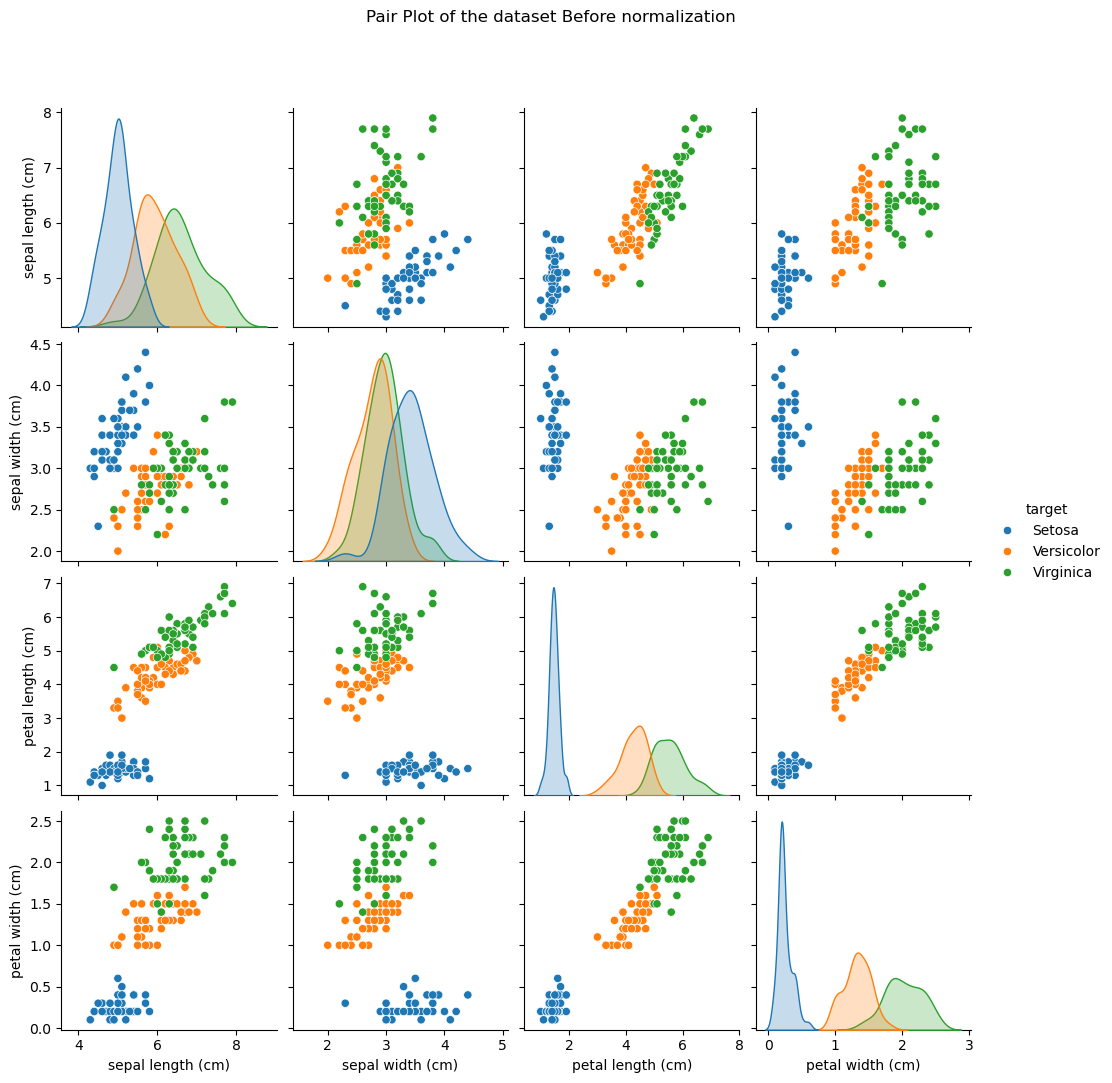

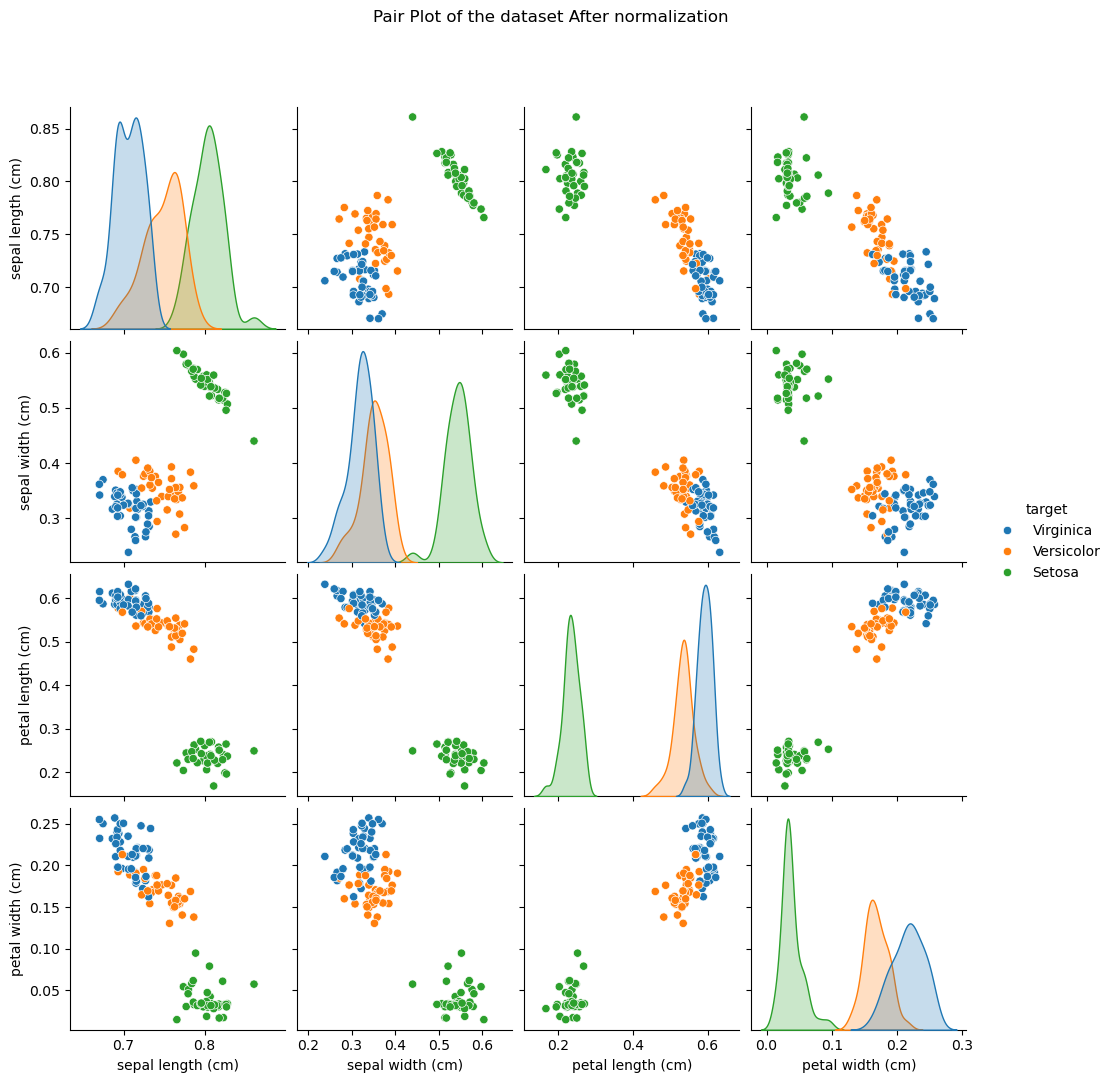

In [11]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

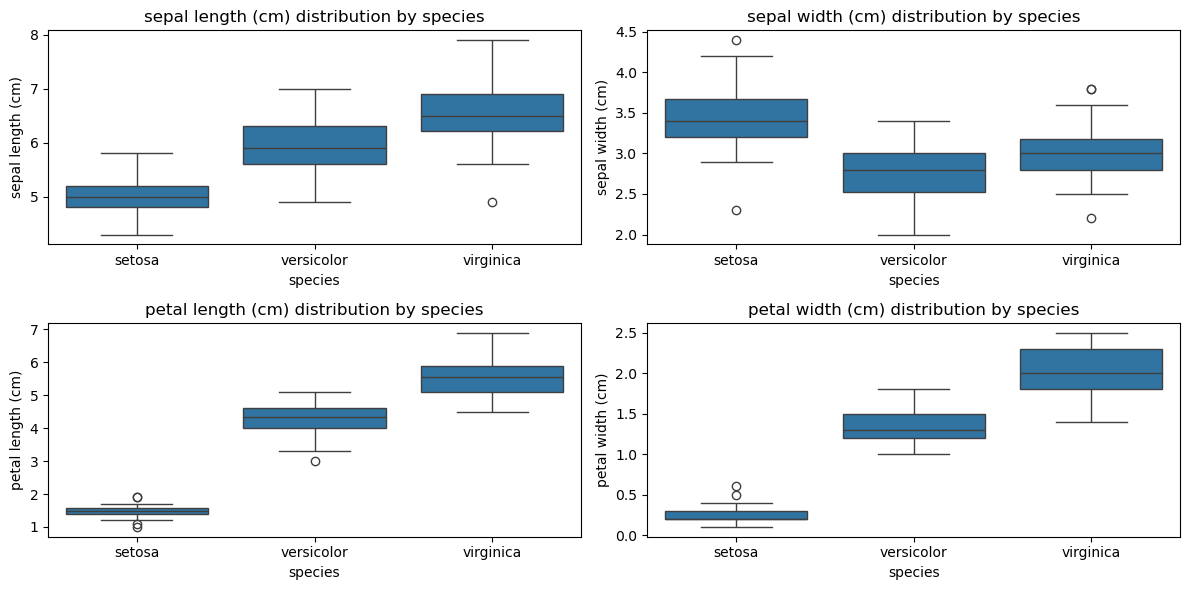

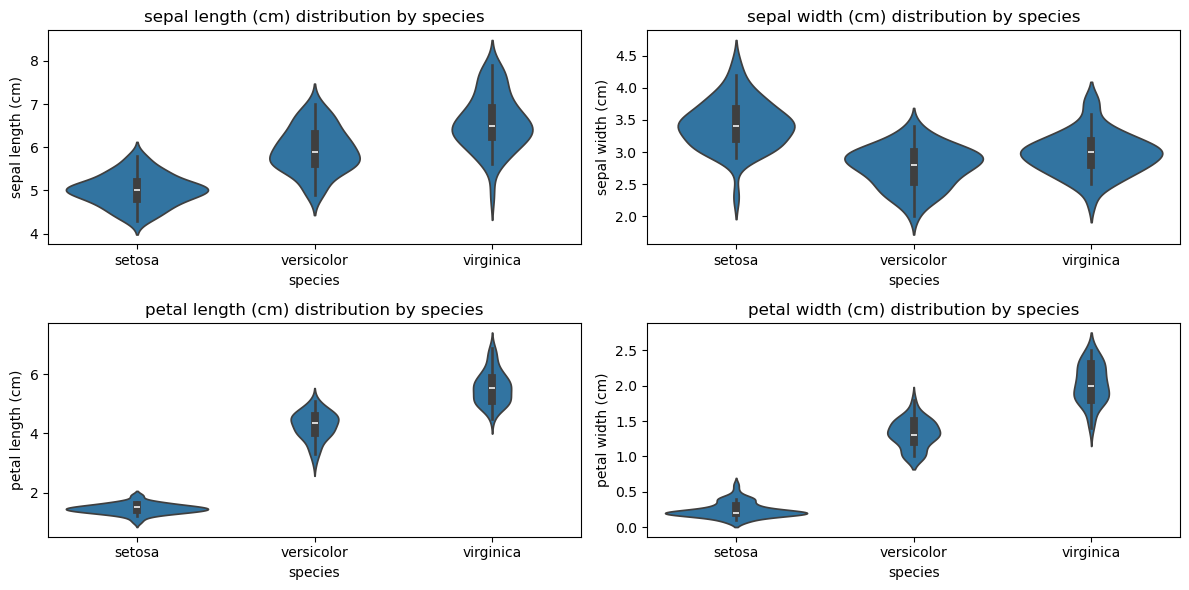

In [12]:

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]

# Boxplot for individual features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} distribution by species')

plt.tight_layout()
plt.show()

# Violin plot for individual features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} distribution by species')

plt.tight_layout()
plt.show()

## Implementation

    Our implementation of the KNN algorithm from scratch is well-structured and follows the typical steps of computing distances, finding nearest neighbors, and performing majority voting.
    The comparison between your KNN implementation and the scikit-learn KNN classifier shows that the results match, indicating the correctness of your implementation.

In [13]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [14]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [15]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

In [16]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

In [17]:
# Set the value of K
K = 3

In [18]:
# Use KNN from scratch to make predictions
y_pred_scratch = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)


# Use scikit-learn's KNeighborsClassifier to make predictions
knn = KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn = knn.predict(normalized_x_test)

In [19]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


## Evaluation

We've used accuracy as the evaluation metric, and we've also performed k-fold cross-validation to find the best value of K to avoid overfitting and select a robust K value.
Additionally, we have used metrics are commonly used for evaluating the performance of a k-Nearest Neighbors (KNN) model:

Accuracy:

    The proportion of correctly classified instances out of the total instances.

Accuracy=Number of Correct PredictionsTotal Number of PredictionsAccuracy=Total Number of PredictionsNumber of Correct Predictions​

Precision:

    The proportion of true positive predictions out of the total instances predicted as positive.

Precision=True PositivesTrue Positives + False PositivesPrecision=True Positives + False PositivesTrue Positives​

Recall (Sensitivity):

    The proportion of true positive predictions out of the total actual positive instances.

Recall=True PositivesTrue Positives + False NegativesRecall=True Positives + False NegativesTrue Positives​

F1 Score:

    The harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.

F1=2×Precision×RecallPrecision+RecallF1=Precision+Recall2×Precision×Recall​

Providing a more detailed evaluation of the model's performance.

In [20]:
# Check if predictions from scratch and scikit-learn match
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

# Evaluate the models
print(f'The accuracy of our implementation is: {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of scikit-learn implementation is: {accuracy_score(y_test, y_pred_sklearn)}')


True
The accuracy of our implementation is: 0.9666666666666667
The accuracy of scikit-learn implementation is: 0.9666666666666667


In [21]:
# Perform k-fold cross-validation to find the best value of K
n_splits = 4
kf = KFold(n_splits=n_splits)

accuracy_k = []

# Search for the best value of K
k_values = list(range(1, 30, 2))

for k in k_values:
    accuracy_fold = 0
    for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in kf.split(normalized_x_train):
        normalized_x_train_fold = normalized_x_train[normalized_x_train_fold_idx]
        y_train_fold = y_train[normalized_x_train_fold_idx]

        normalized_x_test_fold = normalized_x_train[normalized_x_valid_fold_idx]
        y_valid_fold = y_train[normalized_x_valid_fold_idx]

        y_pred_fold = KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)
        accuracy_fold += accuracy_score(y_pred_fold, y_valid_fold)

    accuracy_fold = accuracy_fold / n_splits
    accuracy_k.append(accuracy_fold)


In [22]:
# Print the accuracy for each K value
print(f'The accuracy for each K value was {list(zip(accuracy_k, k_values))}')

The accuracy for each K value was [(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [23]:
# Print the best accuracy and corresponding value of K
print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K={k_values[np.argmax(accuracy_k)]}')

Best accuracy was 0.9666666666666668, which corresponds to a value of K=1


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report, confusion_matrix

In [25]:
# Calculate precision, recall, and F1-score
scratch_precision = precision_score(y_test, y_pred_scratch, average='macro')
sk_precision = precision_score(y_test, y_pred_sklearn, average='macro')
scratch_recall = recall_score(y_test, y_pred_scratch, average='macro')
sk_recall = recall_score(y_test, y_pred_sklearn, average='macro')
scratch_f1 = f1_score(y_test, y_pred_scratch, average='macro')
sk_f1 = f1_score(y_test, y_pred_sklearn, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred_scratch)

In [35]:
# Print precision, recall, and F1-score
print(f'Precision (from scratch): {scratch_precision}')
print(f'Precision (scikit-learn): {sk_precision}')
print(f'Recall (from scratch): {scratch_recall}')
print(f'Recall (scikit-learn): {sk_recall}')
print(f'F1 Score (from scratch): {scratch_f1}')
print(f'F1 Score (scikit-learn): {sk_f1}')
print(f'Confusion matrix(from scratch): {conf_matrix}')

Precision (from scratch): 0.9523809523809524
Precision (scikit-learn): 0.9523809523809524
Recall (from scratch): 0.9743589743589745
Recall (scikit-learn): 0.9743589743589745
F1 Score (from scratch): 0.9610256410256409
F1 Score (scikit-learn): 0.9610256410256409
Confusion matrix(from scratch): [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [27]:
# Print classification reports
print('Classification Report (from scratch):')
print(classification_report(y_test, y_pred_scratch, target_names=["Setosa", "Versicolor", "Virginica"]))

Classification Report (from scratch):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [28]:
print('Classification Report (scikit-learn):')
print(classification_report(y_test, y_pred_sklearn, target_names=["Setosa", "Versicolor", "Virginica"]))

Classification Report (scikit-learn):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Decision boundary¶

Now, we fit two classifiers with different values of the parameter weights. We plot the decision boundary of each classifier as well as the original dataset to observe the difference.

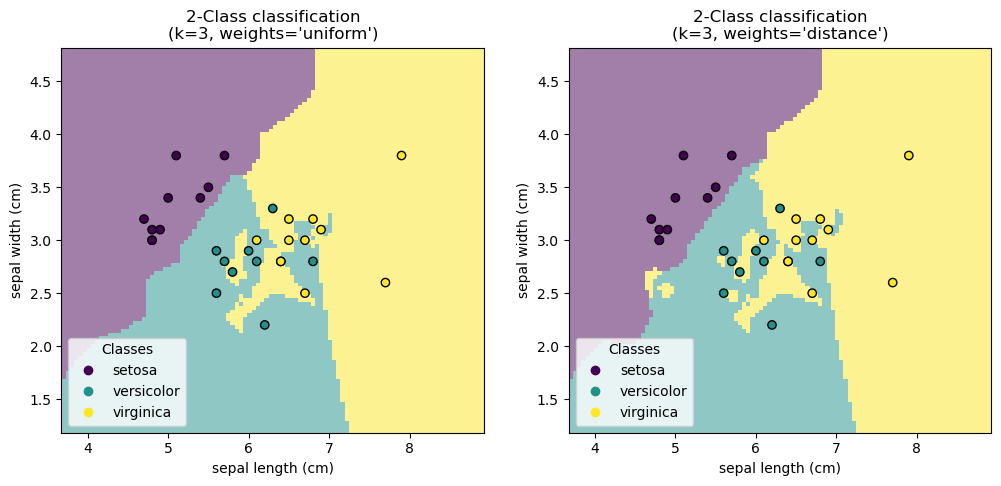

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Choose the first two features for visualization
X_subset = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Create a k-NN classifier
clf = KNeighborsClassifier(n_neighbors=3)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"2-Class classification\n(k={clf.n_neighbors}, weights={weights!r})"
    )

plt.show()




We observe that the parameter weights has an impact on the decision boundary. When weights="unifom" all nearest neighbors will have the same impact on the decision. Whereas when weights="distance" the weight given to each neighbor is proportional to the inverse of the distance from that neighbor to the query point.

In some cases, taking the distance into account might improve the model.

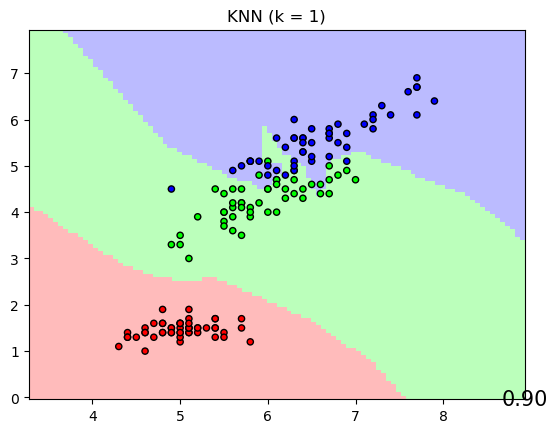

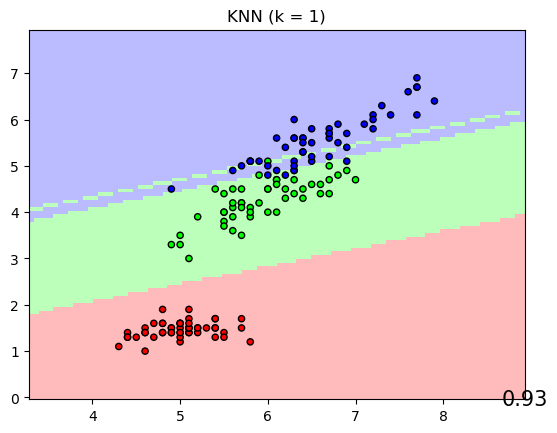

In [30]:
# License: BSD 3 clause

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        1.0,
        0.0,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()